In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [223]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [224]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivvra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [225]:
c = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  c.append(review)

In [226]:
dataset.shape

(1000, 2)

In [253]:
dataset.head

<bound method NDFrame.head of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [228]:
#Checking wheather dataset has any null values

dataset.isnull().any()

Review    False
Liked     False
dtype: bool

In [229]:
#Top 10 Disliked Reviews

dataset[dataset['Liked']==0].head(10)

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
11,Would not go back.,0
12,The cashier had no care what so ever on what I...,0
14,I was disgusted because I was pretty sure that...,0
15,I was shocked because no signs indicate cash o...,0
17,Waitress was a little slow in service.,0


In [230]:
#Top 10 Liked Reviews

dataset[dataset['Liked']==1].head(10)

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
10,Service was very prompt.,1
13,"I tried the Cape Cod ravoli, chicken, with cra...",1
16,Highly recommended.,1
21,"The food, amazing.",1
22,Service is also cute.,1


Text(0, 0.5, 'Count')

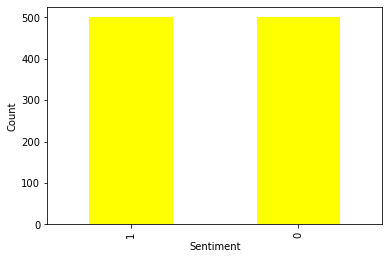

In [231]:
#Graph of number of positive tweets and negative tweets

dataset['Liked'].value_counts().plot.bar(color = 'yellow', figsize = (6,4))
plt.xlabel('Sentiment')
plt.ylabel('Count')

Text(0.5, 0, 'Reviews')

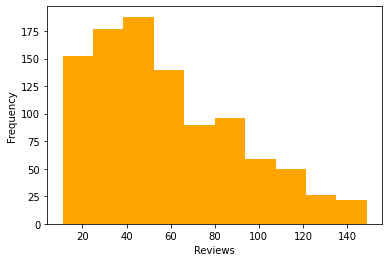

In [232]:
length = dataset['Review'].str.len().plot.hist(color='orange',figsize=(6,4))
plt.xlabel('Reviews')

In [233]:
dataset.groupby('Liked').describe()

Review                                
       count unique                 top freq
Liked                                       
0        500    497    I won't be back.    2
1        500    499  I love this place.    2

In [234]:
performance = []

In [235]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(c).toarray()
y = dataset.iloc[:, -1].values

In [236]:
#Making Training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [237]:
#Naive Bayies

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [238]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [239]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
NAVIE = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)
performance.append(accuracy_score(y_test, y_pred))

[[55 42]
 [12 91]]


In [240]:
print(NAVIE)

0.73


In [241]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)

In [242]:
print(cm)

[[80 17]
 [27 76]]


In [243]:
LOGISTIC = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)
performance.append(accuracy_score(y_test, y_pred))

In [244]:
print(LOGISTIC)

0.78


In [245]:
#Support vector machine

from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
predictions=svc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [246]:
print(cm)

[[89  8]
 [36 67]]


In [247]:
SVC = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)
performance.append(accuracy_score(y_test, y_pred))

In [248]:
print(SVC)

0.78


In [249]:
dframe=pd.DataFrame({'performance':performance},index=['LOGISTIC','NAIVE','SVC'])

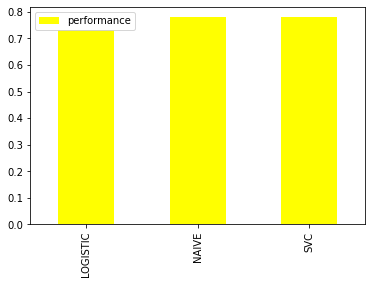

In [250]:
dframe.plot.bar(color='yellow')